<a href="https://colab.research.google.com/github/brito-bernardo/osmnx/blob/main/MoreStreetIntersections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 4.0 MB/s eta 0:00:00


In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from sklearn.neighbors import KDTree
import numpy as np

In [4]:
place_name = "Porto, Portugal"
G = ox.graph_from_place(place_name, network_type='drive')

In [5]:
# Filtrar interseções com grau de conectividade maior que 2
intersections = ox.graph_to_gdfs(G, nodes=True, edges=False)
filtered_intersections = intersections[intersections.index.isin([node for node, degree in dict(G.degree()).items() if degree > 2])]


In [6]:
# Converter as interseções para coordenadas adequadas para KDTree
coords = np.array(list(zip(filtered_intersections.geometry.x, filtered_intersections.geometry.y)))

In [11]:
# Construir KDTree e consultar as interseções próximas
tree = KDTree(coords)
indices = tree.query_radius(coords, r=30)  # r é a distância em metros


In [12]:
#Filtrar interseções que estão muito próximas
to_keep = set()
for idx, neighbors in enumerate(indices):
    if idx not in to_keep:
        to_keep.add(idx)
        to_keep.update(neighbors)

filtered_intersections = filtered_intersections.iloc[list(to_keep)]

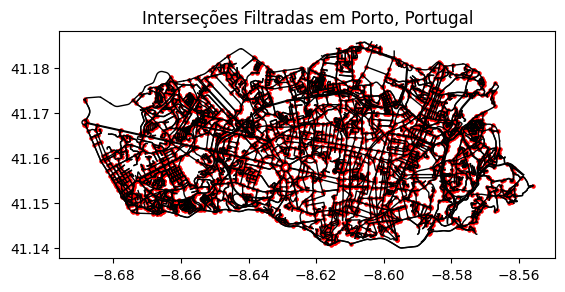

In [14]:
# Plotar
fig, ax = plt.subplots()
for _, edge in ox.graph_to_gdfs(G, nodes=False, edges=True).iterrows():
    line = edge.geometry
    x, y = line.xy
    ax.plot(x, y, color="black", linewidth=1)

filtered_intersections.plot(ax=ax, color='red', markersize=5)
ax.set_title("Interseções Filtradas em {}".format(place_name))
plt.show()